In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [59]:
coco=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\CocaCola_Sales_Rawdata.xlsx')
coco

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### EDA

In [60]:
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [61]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [62]:
coco.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [63]:
coco.isna().sum()

Quarter    0
Sales      0
dtype: int64

<AxesSubplot:>

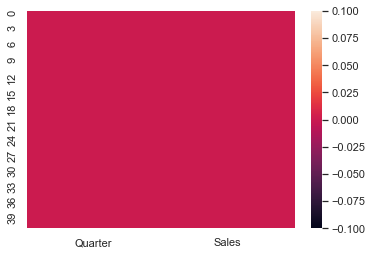

In [64]:
sns.heatmap(coco.isna())

## Visualization

<AxesSubplot:>

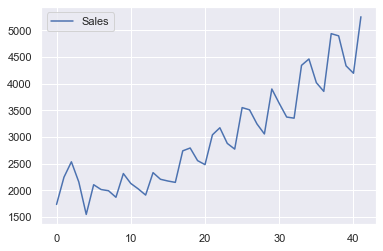

In [65]:
coco.plot()

<AxesSubplot:>

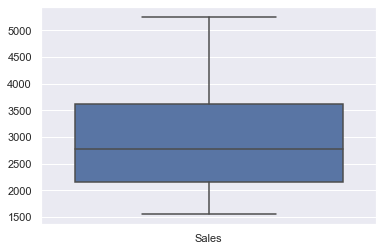

In [66]:
sns.boxplot(data=coco)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

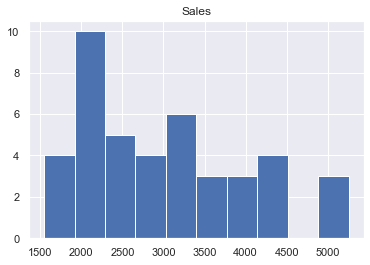

In [67]:
coco.hist()

<AxesSubplot:ylabel='Density'>

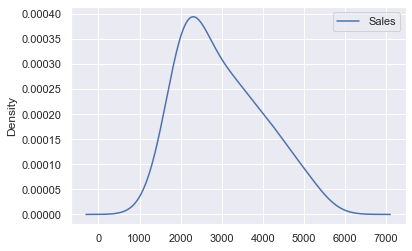

In [68]:
coco.plot(kind='kde')

In [69]:
np.array(coco['Sales'])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

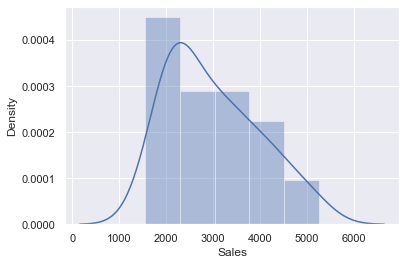

In [70]:
sns.set_theme()
rk= sns.distplot(coco['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

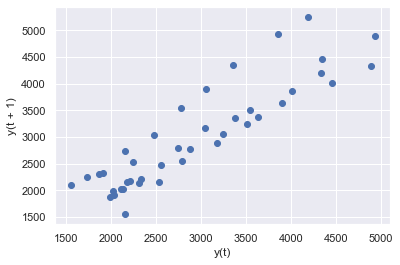

In [71]:
from pandas.plotting import lag_plot
lag_plot(coco['Sales'])

In [72]:
coco['quarter'] = 0
for i in range(42):
    p=coco['Quarter'][i]
    coco['quarter'][i]=p[0:2]

In [73]:
coco

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [74]:
coco['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [75]:
coco_dummies=pd.DataFrame(pd.get_dummies(coco['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([coco,coco_dummies],axis= 1)

In [76]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [77]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(coco['Sales'])

In [78]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [79]:
train =cc.head(35)
test =cc.tail(7)

### Moving Average

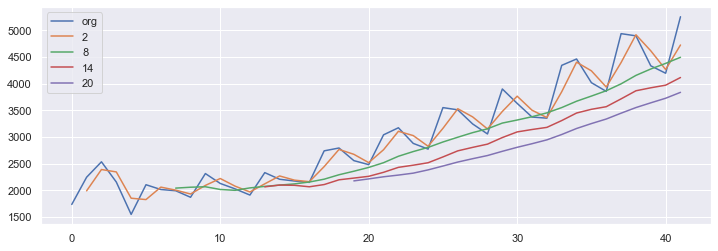

In [80]:
plt.figure(figsize=(12,4))
coco.Sales.plot(label="org")
for i in range(2,24,6):
    coco["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

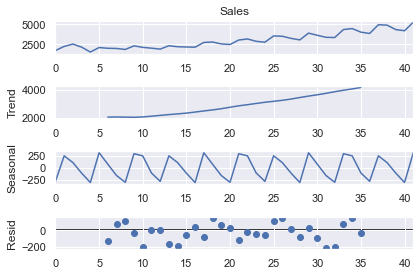

In [81]:
decompose_ts_add = seasonal_decompose(coco.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

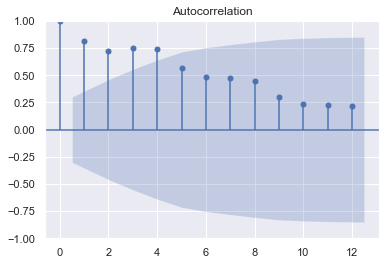

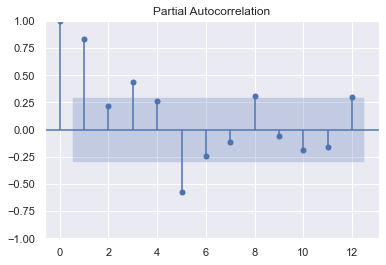

In [82]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coco.Sales,lags=12)
tsa_plots.plot_pacf(coco.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [83]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [84]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 


16.401825273142318

### Holt Method

In [85]:
# Holt method 
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

15.891434335419715

In [86]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

5.168683559665125

In [88]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

2.10397230598553

### Final Model by combining train and test

In [89]:
hwe_model_add_add = ExponentialSmoothing(coco["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
hwe_model_add_add

In [90]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5055.473168
43    4927.514092
44    4883.192198
45    5555.464775
46    5589.532032
47    5335.128014
48    5233.834805
49    5969.975534
50    6031.661859
51    5756.156910
dtype: float64

### Transformation

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

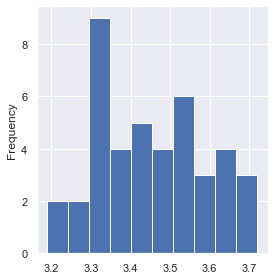

In [92]:
## log transformation - power law distribution ##
log_var = ['Sales']
fig = plt.figure(figsize = (24,10))

for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    coco[transformed] = np.log10(coco[var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    coco[transformed].plot(kind = 'hist')

count      42.000000
mean     2994.353308
std       977.930896
min      1547.818996
25%      2159.714247
50%      2782.376999
75%      3609.250000
max      5253.000000
Name: Sales, dtype: float64
count      42.000000
mean     2994.295858
std       939.089093
min      1871.127699
25%      2159.714247
50%      2782.376999
75%      3609.250000
max      4873.300000
Name: clipped_Sales, dtype: float64


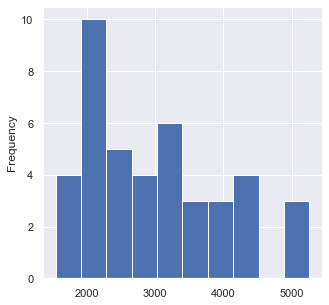

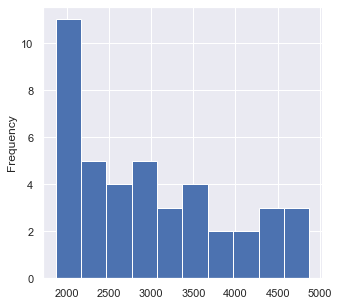

In [93]:
## clipping methods - handle outliers ##
clip_var = ['Sales']
for i in clip_var:
    transformed = 'clipped_'+ i
# upper limit - .95 quantile
    upper_limit = coco[i].quantile(0.95)
# lower limit - .05 quantile
    lower_limit = coco[i].quantile(0.05)
    coco[transformed] = coco[i].clip(lower_limit, upper_limit, axis = 0)
    
    print(coco[i].describe())
    print(coco[transformed].describe())
    
    plt.figure(figsize = (5,5))
    coco[i].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    coco[transformed].plot(kind = 'hist')

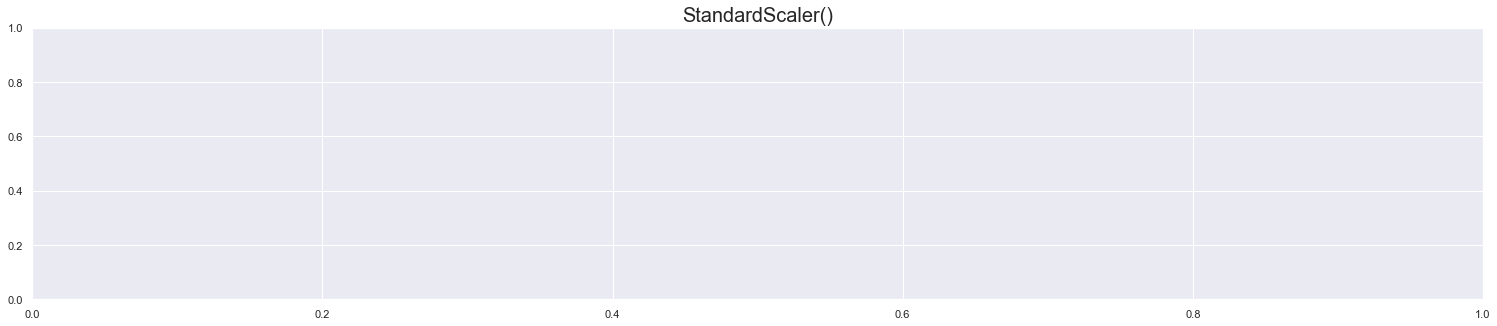

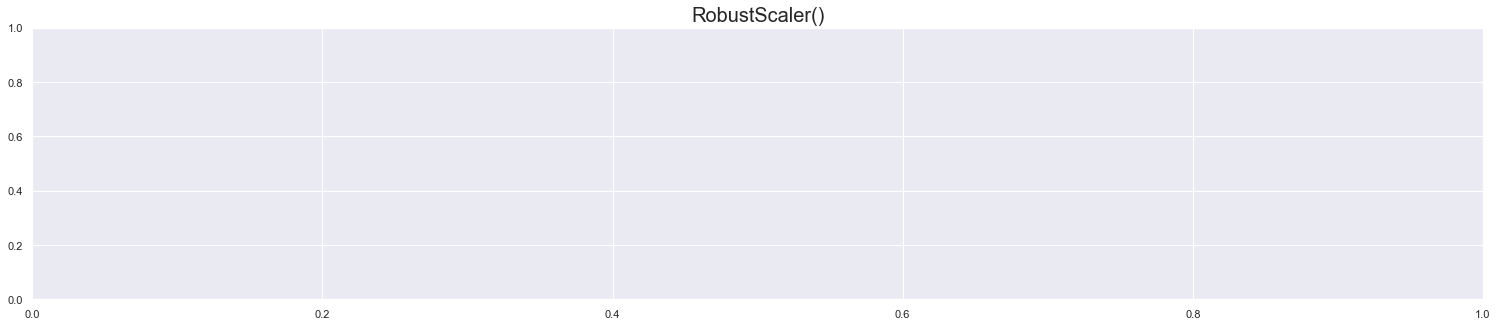

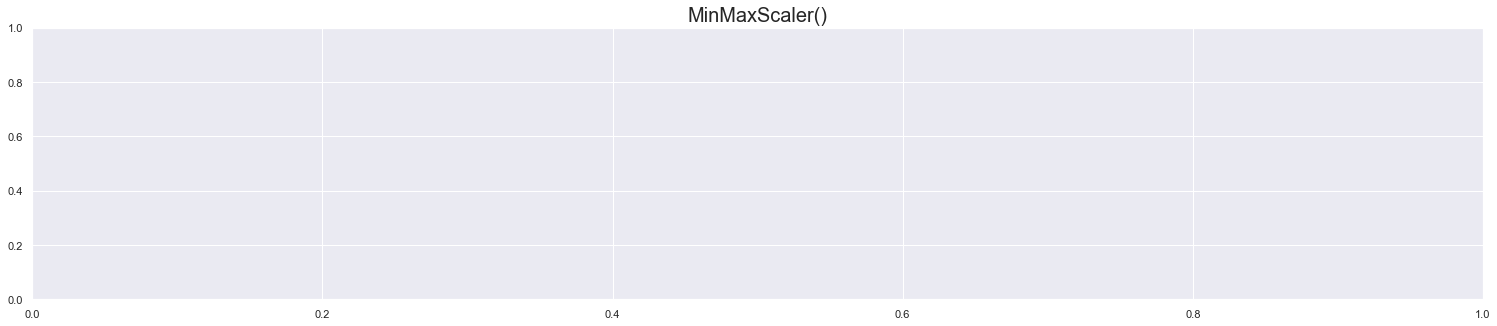

In [94]:
## data scaling methods ##
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scale_var = []
scalers_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]
for i in range(len(scalers_list)):
    scaler = scalers_list[i]
    fig = plt.figure(figsize = (26, 5))
    plt.title(scaler, fontsize = 20)
    for j in range(len(scale_var)):
        var = scale_var[j]
        scaled_var = "scaled_" + var
        model = scaler.fit(coco[var].values.reshape(-1,1))
        coco[scaled_var] = model.transform(coco[var].values.reshape(-1, 1))
        sub = fig.add_subplot(1, 5, j + 1)
        sub.set_xlabel(var)
        coco[scaled_var].plot(kind = 'hist')

### Model Building

In [95]:
# Linear Model
from sklearn.metrics import mean_squared_error
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

636.5072930351143

In [96]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

511.811731941759

In [97]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4515.811064811282

In [98]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,511.811732
0,rmse_linear,636.507293
1,rmse_exp,4515.811065


### Using ARIMA model

In [99]:
data=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [100]:
#separate out a validation dataset
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [101]:
dataset_cc.to_csv('dataset_cc.csv', header=False,index=False)
validation_cc.to_csv('validation_cc.csv', header=False, index=False)

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train = pd.read_csv('dataset_cc.csv', header=None, parse_dates=True, squeeze=True,index_col=0)

train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [103]:
x = train.values
x = x.astype('float32')
train_size = int(len(X) * 0.50)
train, test = x[0:train_size], x[train_size:]

In [104]:
x

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    , 3352.    , 4342.    , 4461.    ],
      dtype=float32)

In [106]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [107]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,511.811732
0,rmse_linear,636.507293
1,rmse_exp,4515.811065


#### The least RMSE values has the RMSE_ARMIA model and we can final this model

### ARIMA hyperparameters

In [108]:
from statsmodels.tsa.arima_model import ARIMA

In [109]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(x, arima_order):
    # prepare training dataset
    X = x.astype('float32')
    train_size = int(len(x) * 0.50)
    train, test = x[0:train_size], x[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [110]:
rmse

434.40066470943617

In [111]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [112]:
# load dataset
train = pd.read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
#evaluate_models(train.values, p_values, d_values, q_values)

#### Build Model based on the optimized values

In [113]:
import statsmodels.api as sm

In [114]:
sm.tsa.arima.ARIMA(train, order=(1,1,2))

In [115]:
# load data
train = pd.read_csv('dataset_cc.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [116]:
# fit model
model = sm.tsa.arima.ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=7)

In [117]:
model_fit

In [118]:
forecast

array([3720.01680755, 3463.75074926, 4042.75523381, 4340.58137746,
       3928.23604822, 3608.00801228, 3891.84767663])

In [119]:
from statsmodels.graphics.tsaplots import plot_predict

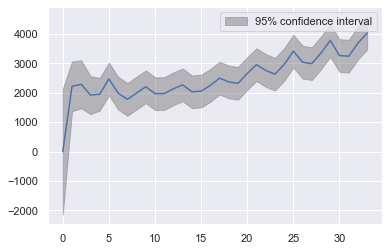

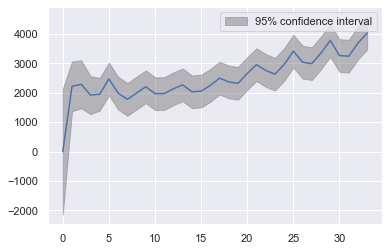

In [120]:
plot_predict(model_fit)

In [121]:
type(forecast)

numpy.ndarray

In [122]:
#Error on the test data
val=pd.read_csv('validation_cc.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

727.5905274455589

#### Combine train and test data and build final model

In [123]:
# fit model
data = pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [124]:
X

array([[2244.961 ],
       [2533.805 ],
       [2154.963 ],
       [1547.819 ],
       [2104.412 ],
       [2014.363 ],
       [1991.747 ],
       [1869.05  ],
       [2313.632 ],
       [2128.32  ],
       [2026.829 ],
       [1910.604 ],
       [2331.165 ],
       [2206.55  ],
       [2173.968 ],
       [2148.278 ],
       [2739.308 ],
       [2792.754 ],
       [2556.01  ],
       [2480.9739],
       [3039.523 ],
       [3172.116 ],
       [2879.001 ],
       [2772.    ],
       [3550.    ],
       [3508.    ],
       [3243.86  ],
       [3056.    ],
       [3899.    ],
       [3629.    ],
       [3373.    ],
       [3352.    ],
       [4342.    ],
       [4461.    ]], dtype=float32)

In [125]:
model = sm.tsa.arima.ARIMA(X, order=(3,1,0))
model_fit = model.fit()

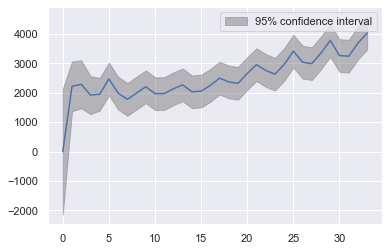

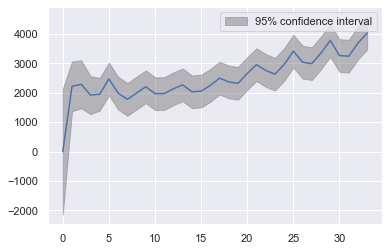

In [126]:
forecast=model_fit.forecast(steps=7)[0]
plot_predict(model_fit)

In [127]:
forecast

3720.0168075484935